# KDAJ SE USTAVITI

## 1. UVOD
V spodnjem poročilu predstavim problem sekretarke in njene razširitve.

## 2. Problem iskanja neveste

### Osnovni problem

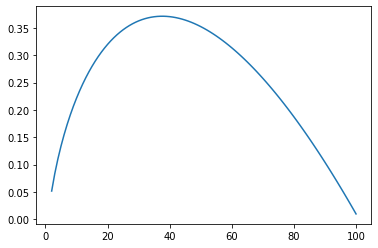

In [10]:
import random
import porocni_problem as fun
import numpy as np
import matplotlib.pyplot as plt

n = 100

verjetnosti_analitična = [fun.verjetnost_najboljsi_kandidat(n,r) for r in range(2,n+1)]
x = [i for i in range(2,n+1)]

plt.plot(x, verjetnosti_analitična)
plt.show()

In [12]:
verjetnosti_analitična[36]

0.3710427787126428

Uvozimo naše potencialne neveste, ki smo jih oštevilčili od 1 - 100. (Kjer 1 predstavlja najslabšo izbiro in 100 najbolšo).

In [13]:
n = 100 # število kandidatk
m = 100000 #kolikokrat poženemo proces iskanja najbolšega partnerja

tabela_partnerjev = {}
for i in range(m):
    partnerji = list(range(1,n+1))
    random.shuffle(partnerji)
    tabela_partnerjev[i] = partnerji

In [16]:
vsota = 0 
for i in range(m):
    if fun.NajbolsiPartner(tabela_partnerjev[i], round(n * 0.36787944)) == n :
        vsota += 1

print(vsota/m)

0.37243


Zgornja številka ponazarja; s kolikšnim procentom smo se poročili z najbolšo nevesto.

Sedaj bomo preverili, če je zgoraj uporabljen 1/e res najbolša točka ustavitve.

In [17]:
vsotke = [0] * n
for stop in range(n):
    for i in range(m):
        if fun.NajbolsiPartner(tabela_partnerjev[i], stop) == n :
            vsotke[stop] += 1

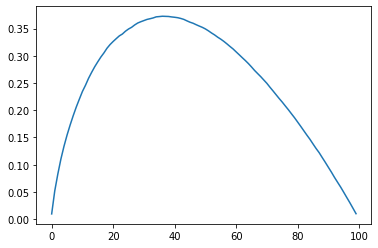

In [18]:
verjetnosti = [x / m for x in vsotke]
x = [i for i in range(n)]

plt.plot(x, verjetnosti)
plt.show()

In [19]:
np.argmax(vsotke)

36

Še primerjava med analitično in simulacijsko krivuljo.

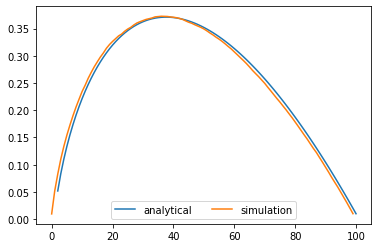

In [22]:
verjetnosti_analitična = [fun.verjetnost_najboljsi_kandidat(n,r) for r in range(2,n+1)]
x_ana = [i for i in range(2,n+1)]

plt.plot(x_ana, verjetnosti_analitična, label = 'analytical')
plt.plot(x, verjetnosti, label = 'simulation')
plt.legend(ncol=3)
plt.show()

S tem smo potrdili, da se nam res najbol splača ustaviti pri približno 37 partnerju.

Kaj pa, če zmanjšamo število kandidatov na 4? Ali pa na 20, 30, 50, 500, 1000? Ali naše pravilo $$max = round(n * 0.36787944)$$ še vedno drži?


In [20]:
m = 5000
n_sez = [4, 20, 30, 50, 500, 1000]

In [21]:
tabela_partnerjev = {}
for n in n_sez: 
    for i in range(m):
        partnerji = list(range(1,n+1))
        random.shuffle(partnerji)
        tabela_partnerjev[(n,i)] = partnerji

In [22]:
vsotke = {}
for n in n_sez:
    for stop in range(n):
        vsotke[(n, stop)] = 0
        for i in range(m):
            if fun.NajbolsiPartner(tabela_partnerjev[(n,i)], stop) == n :
                vsotke[(n, stop)] += 1

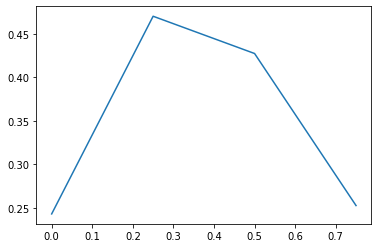

In [23]:
fun.narisi_graf(4, vsotke, m)

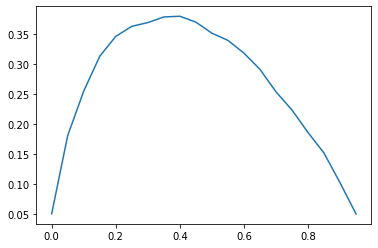

In [24]:
fun.narisi_graf(20, vsotke, m)

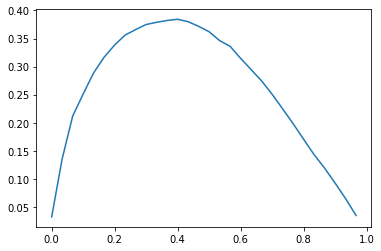

In [25]:
fun.narisi_graf(30,vsotke,m)

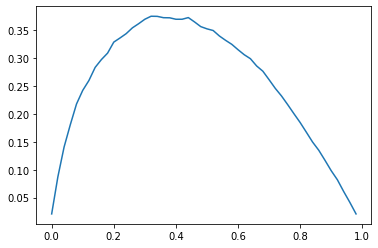

In [26]:
fun.narisi_graf(50,vsotke,m)

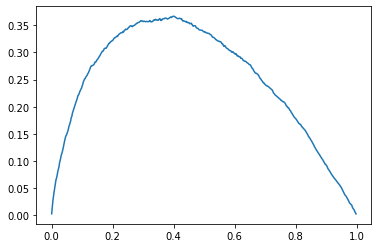

In [27]:
fun.narisi_graf(500,vsotke,m)

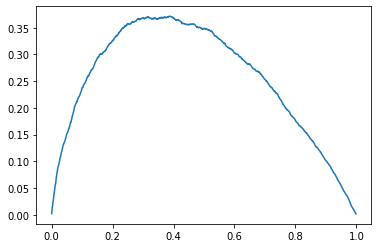

In [28]:
fun.narisi_graf(1000,vsotke,m)